From the mode variation matrix, 'school bus', 'walk' and 'car/van' may have expected statistical rules because they are the dominated parts of the mode choices. 

So first, we select these data rows as a new dataframe.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('processed.csv')
data.head(9)

,age,IMD2019_decile,household_size,mor_travel,aft_travel,#car,unwill_walk,ethnicity_Other,ethnicity_Pakistani,ethnicity_White British,...,mode_now_Walk,mode_before_Bicycle,mode_before_Car/Van,mode_before_Other bus,mode_before_School Bus,mode_before_Taxi,mode_before_Train,mode_before_Walk,Y1,Y2
0,12,1,5.0,1.0,1.0,3.0,2.0,0,0,1,...,0,0,1,0,0,0,0,0,0.0,car-car
1,12,2,4.0,4.0,3.0,NaN,NaN,1,0,0,...,1,0,0,0,0,0,0,1,0.0,walk-walk
2,12,4,4.0,3.0,3.0,3.0,NaN,0,0,1,...,1,0,0,0,0,0,0,1,0.0,walk-walk
3,12,1,3.0,2.0,3.0,3.0,NaN,0,0,1,...,1,0,1,0,0,0,0,0,1.0,car-walk
4,12,8,4.0,5.0,4.0,3.0,NaN,0,0,1,...,1,0,0,0,0,0,0,1,0.0,walk-walk
5,10,8,4.0,1.0,2.0,3.0,NaN,0,0,1,...,1,0,1,0,0,0,0,0,1.0,car-walk
6,12,6,NaN,5.0,5.0,2.0,NaN,0,0,1,...,1,0,0,0,0,0,0,1,0.0,walk-walk
7,9,6,NaN,4.0,4.0,2.0,2.0,0,0,1,...,1,0,0,0,0,0,0,1,0.0,walk-walk
8,12,2,4.0,1.0,3.0,3.0,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0.0,car-car


In [3]:
# select the needed modes

df=data[(data['mode_now_Car/Van']>0)|(data['mode_now_School Bus']>0)|data['mode_now_Walk']>0]
df.shape

(591, 28)

In [4]:
df=df[(df['mode_before_Car/Van']>0)|(df['mode_before_School Bus']>0)|(df['mode_before_Walk']>0)]
df.shape

(583, 28)

In [5]:
df.head(9)

,age,IMD2019_decile,household_size,mor_travel,aft_travel,#car,unwill_walk,ethnicity_Other,ethnicity_Pakistani,ethnicity_White British,...,mode_now_Walk,mode_before_Bicycle,mode_before_Car/Van,mode_before_Other bus,mode_before_School Bus,mode_before_Taxi,mode_before_Train,mode_before_Walk,Y1,Y2
0,12,1,5.0,1.0,1.0,3.0,2.0,0,0,1,...,0,0,1,0,0,0,0,0,0.0,car-car
1,12,2,4.0,4.0,3.0,NaN,NaN,1,0,0,...,1,0,0,0,0,0,0,1,0.0,walk-walk
2,12,4,4.0,3.0,3.0,3.0,NaN,0,0,1,...,1,0,0,0,0,0,0,1,0.0,walk-walk
3,12,1,3.0,2.0,3.0,3.0,NaN,0,0,1,...,1,0,1,0,0,0,0,0,1.0,car-walk
4,12,8,4.0,5.0,4.0,3.0,NaN,0,0,1,...,1,0,0,0,0,0,0,1,0.0,walk-walk
5,10,8,4.0,1.0,2.0,3.0,NaN,0,0,1,...,1,0,1,0,0,0,0,0,1.0,car-walk
6,12,6,NaN,5.0,5.0,2.0,NaN,0,0,1,...,1,0,0,0,0,0,0,1,0.0,walk-walk
7,9,6,NaN,4.0,4.0,2.0,2.0,0,0,1,...,1,0,0,0,0,0,0,1,0.0,walk-walk
8,12,2,4.0,1.0,3.0,3.0,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0.0,car-car


Note that there are 583 rows and this euqals the former calculation. Then, we need to define the target variable and do some feature selection to delete some columns.

 for binary classification,    
 &emsp; mode_change -1; &emsp; mode_same 1  
    
    
 for multi-class classification,  there are many perspectives to design the labels.  
Method 1:  Assume that there is a partial ordering relation according to the privacy/risk ( or the number of people students may encounter during the school commuting.)  Car -> Walk -> School Bus. Then, if the mode before is car and now is walk, we give 1 representing the risk rising 1. If they are same, then give 0.
 &emsp; &emsp;&emsp; &emsp;mode_same = 0,    
 &emsp; &emsp;&emsp; &emsp;car - walk = 1,  
 &emsp; &emsp;&emsp; &emsp;car - bus = 2,  
 &emsp; &emsp;&emsp; &emsp;walk - car = -1,  
 &emsp; &emsp;&emsp; &emsp;walk - bus =1,  
 &emsp; &emsp;&emsp; &emsp;bus - car = -2,  
 &emsp; &emsp; &emsp;&emsp;bus - walk = -1  
   
   
Method 2: For different mode-changes, give different labels using one-hot encoding.



##  Method1

In [6]:
# Y1 is the target variable for method 1.
df['Y1'].value_counts()

 0.0    475
-1.0     45
 1.0     45
 2.0     15
-2.0      3
Name: Y1, dtype: int64

In [7]:
# since y1=-2 is too small, delete y1=-2
df1=df[df['Y1']!=-2]
df1['Y1'].value_counts()

 0.0    475
-1.0     45
 1.0     45
 2.0     15
Name: Y1, dtype: int64

<AxesSubplot:>

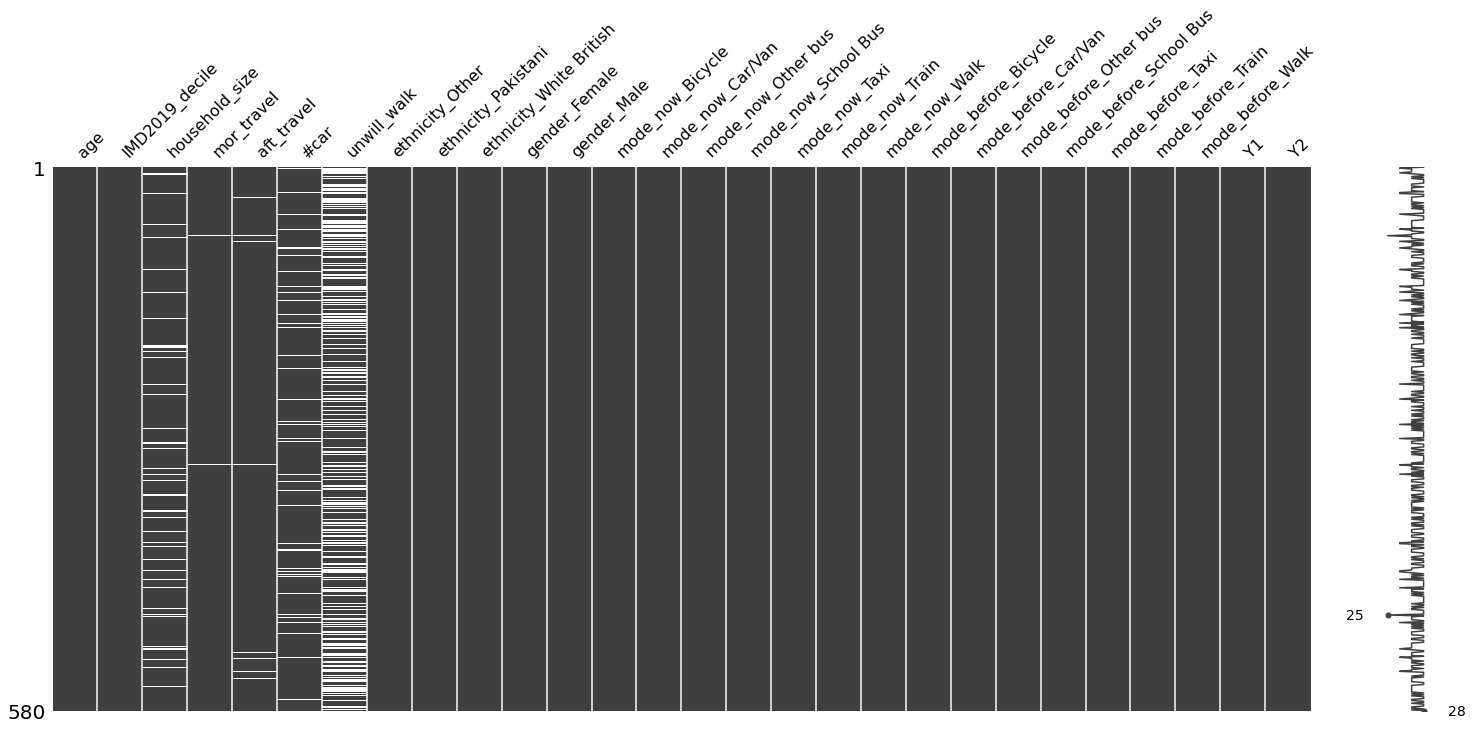

In [8]:
# from the missing value analysis, 
# unwill_walk has too many missing values and it is not meaningful for real prediction, so delete it
import missingno as msno
msno.matrix(df1)

In [10]:
# delete the unwill_walk (high missing value rate), and obvious collinear variables
df1 = df1.drop(['unwill_walk'],axis=1)
df1

,age,IMD2019_decile,household_size,mor_travel,aft_travel,#car,ethnicity_Other,ethnicity_Pakistani,ethnicity_White British,gender_Female,...,mode_now_Walk,mode_before_Bicycle,mode_before_Car/Van,mode_before_Other bus,mode_before_School Bus,mode_before_Taxi,mode_before_Train,mode_before_Walk,Y1,Y2
0,12,1,5.0,1.0,1.0,3.0,0,0,1,1,...,0,0,1,0,0,0,0,0,0.0,car-car
1,12,2,4.0,4.0,3.0,NaN,1,0,0,1,...,1,0,0,0,0,0,0,1,0.0,walk-walk
2,12,4,4.0,3.0,3.0,3.0,0,0,1,1,...,1,0,0,0,0,0,0,1,0.0,walk-walk
3,12,1,3.0,2.0,3.0,3.0,0,0,1,1,...,1,0,1,0,0,0,0,0,1.0,car-walk
4,12,8,4.0,5.0,4.0,3.0,0,0,1,0,...,1,0,0,0,0,0,0,1,0.0,walk-walk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,11,1,3.0,5.0,4.0,2.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0.0,walk-walk
628,11,4,3.0,3.0,3.0,2.0,0,0,0,1,...,0,0,1,0,0,0,0,0,2.0,car-bus
630,11,8,4.0,5.0,5.0,2.0,0,0,1,0,...,1,0,0,0,0,0,0,1,0.0,walk-walk
631,9,8,4.0,5.0,5.0,2.0,0,0,1,0,...,1,0,1,0,0,0,0,0,1.0,car-walk


<AxesSubplot:>

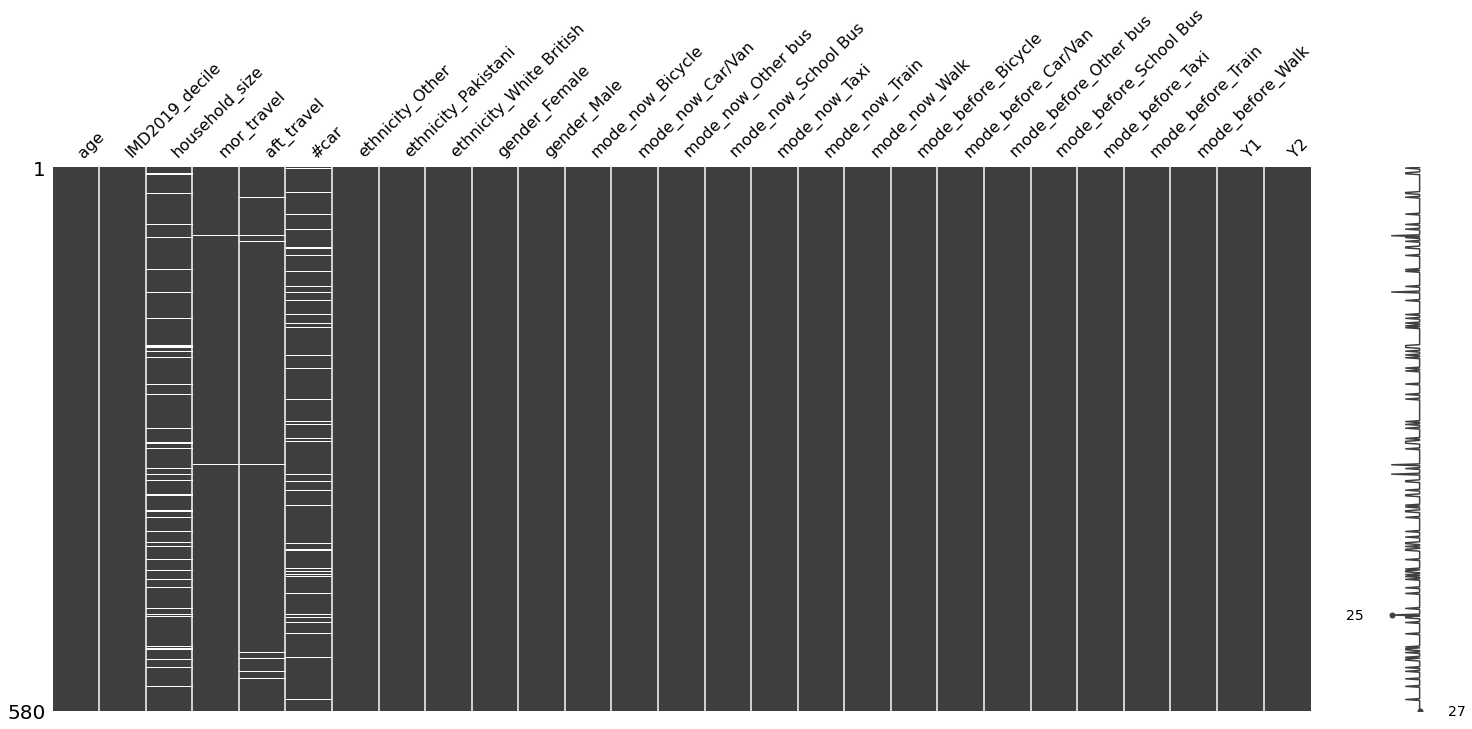

In [11]:
msno.matrix(df1)

In [12]:
df1.dropna(axis=0,how='any').shape

(489, 27)

In [13]:
df1.columns

Index(['age', 'IMD2019_decile', 'household_size', 'mor_travel', 'aft_travel',
       '#car', 'ethnicity_Other', 'ethnicity_Pakistani',
       'ethnicity_White British', 'gender_Female', 'gender_Male',
       'mode_now_Bicycle', 'mode_now_Car/Van', 'mode_now_Other bus',
       'mode_now_School Bus', 'mode_now_Taxi', 'mode_now_Train',
       'mode_now_Walk', 'mode_before_Bicycle', 'mode_before_Car/Van',
       'mode_before_Other bus', 'mode_before_School Bus', 'mode_before_Taxi',
       'mode_before_Train', 'mode_before_Walk', 'Y1', 'Y2'],
      dtype='object')

In [14]:
# feature selection: basic attributes without 

X1 = df1.dropna(axis=0,how='any')[['age', 'IMD2019_decile', 'household_size', 'mor_travel', 'aft_travel',
       '#car',  'ethnicity_Pakistani','ethnicity_White British', 'gender_Female']]
Y1 = df1.dropna(axis=0,how='any')['Y1']



In [15]:
X1.shape

(489, 9)

In [16]:
Y1.shape

(489,)

<AxesSubplot:>

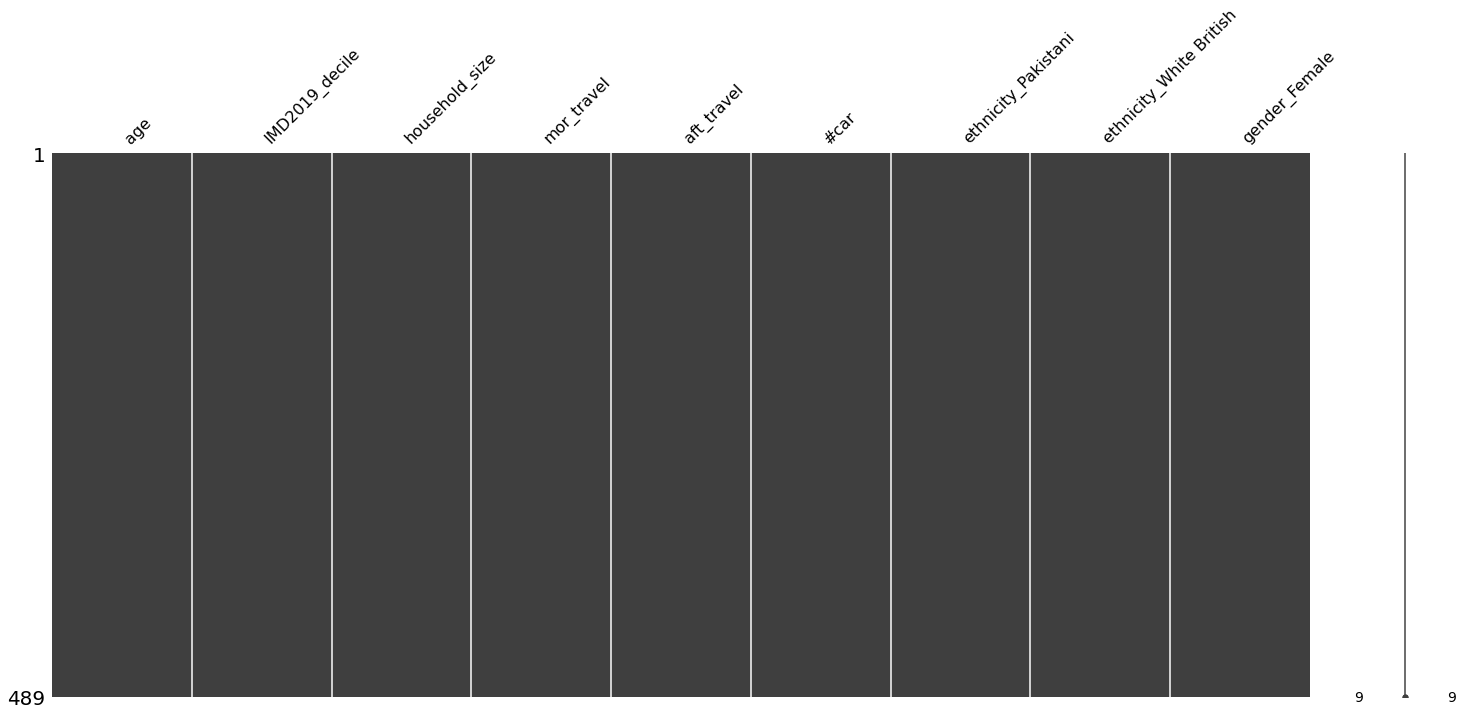

In [17]:
msno.matrix(X1)

In [19]:
## SOME UNSUPERVISED LEARNING
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X1)

PCA(n_components=2)

In [20]:
X_pca=pca.transform(X1)
X_pca.shape

(489, 2)

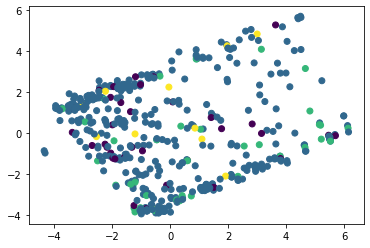

In [22]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0],X_pca[:,1],c=Y1)

In [24]:
## use another way to show the visualization
from sklearn.manifold import Isomap
isomap = Isomap(n_components = 2, n_neighbors=20)
isomap.fit(X1)

Isomap(n_neighbors=20)

In [25]:
x_isomap=isomap.transform(X1)
x_isomap.shape

(489, 2)

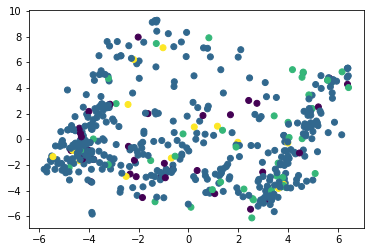

In [26]:
plt.scatter(x_isomap[:,0],x_isomap[:,1],c=Y1)

In [27]:
Y1.value_counts()

 0.0    399
 1.0     41
-1.0     35
 2.0     14
Name: Y1, dtype: int64

In [31]:
# classify for Y1
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,Y1,stratify = Y1)

In [32]:
X1_train.shape

(366, 9)

In [33]:
## first, use LinearSVC 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

model = OneVsRestClassifier(LinearSVC(random_state=0))
model.fit(X1_train,y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


OneVsRestClassifier(estimator=LinearSVC(random_state=0))

In [35]:
from sklearn.metrics import roc_auc_score
y_score = model.decision_function(X1_test)
#roc_auc_score(y_test,y_score,multi_class='ovr')

In [36]:
y_score

array([[-0.82592115,  0.46709349, -0.81686919, -0.9628445 ],
       [-0.84278644,  0.49066116, -0.82907176, -0.96030063],
       [-0.83647362,  0.37975073, -0.66642122, -0.98939352],
       [-0.80213439,  0.49788826, -0.85041493, -0.95562816],
       [-0.92462992,  0.62796764, -0.94983301, -0.9163726 ],
       [-0.74819751,  0.43606542, -0.851814  , -0.96558141],
       [-0.87553306,  0.48809147, -0.84951414, -0.90615233],
       [-0.74634907,  0.5071749 , -1.03065073, -0.92057302],
       [-0.79730308,  0.56969877, -0.9803894 , -0.9766049 ],
       [-0.84775856,  0.4024395 , -0.79321585, -0.93444702],
       [-0.84426787,  0.56248313, -0.86219475, -0.96877829],
       [-0.88651695,  0.66455854, -0.91083116, -0.94034122],
       [-0.8583319 ,  0.60570802, -0.93188859, -0.9448683 ],
       [-0.93364131,  0.57416678, -0.71915721, -0.98439613],
       [-0.83823506,  0.59290397, -0.89537634, -0.96789205],
       [-0.7560556 ,  0.51630652, -1.03712253, -0.92833029],
       [-0.78159319,  0.

In [37]:
y_pred = model.predict(X1_test)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[  0,   9,   0,   0],
       [  0, 100,   0,   0],
       [  0,  10,   0,   0],
       [  0,   4,   0,   0]], dtype=int64)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         9
         0.0       0.81      1.00      0.90       100
         1.0       0.00      0.00      0.00        10
         2.0       0.00      0.00      0.00         4

    accuracy                           0.81       123
   macro avg       0.20      0.25      0.22       123
weighted avg       0.66      0.81      0.73       123



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
## check the cross-validation score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X1,Y1,cv=10)
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

array([0.81632653, 0.81632653, 0.81632653, 0.81632653, 0.81632653,
       0.81632653, 0.81632653, 0.81632653, 0.81632653, 0.8125    ])

In [41]:
# the deviation and mean of the scores here
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(),scores.std()*2))

Accuracy: 0.82 (+/- 0.00)


In [42]:
## for method 1, use another model to predict :logistic regression

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver="liblinear")
clf.fit(X1_train,y1_train)



LogisticRegression(solver='liblinear')

In [49]:
y_score = clf.predict_proba(X1_test)

In [44]:
y_test.shape

(123,)

In [45]:
roc_auc_score(y_train, clf.predict_proba(X_train), multi_class='ovr')

0.635532111547533

In [46]:
sum(y_score[1])

1.0

In [ ]:
Y.value_counts()

In [50]:
# the cross-validation
scores1 = cross_val_score(clf,X1,Y1,cv=10)
scores1

array([0.81632653, 0.81632653, 0.81632653, 0.81632653, 0.81632653,
       0.81632653, 0.81632653, 0.81632653, 0.81632653, 0.8125    ])

In [51]:
print('Accuracy: %0.2f (+/- %0.2f)' % (scores1.mean(),scores1.std()*2))

Accuracy: 0.82 (+/- 0.00)


In [53]:
y_pred1 = clf.predict(X1_test)
confusion_matrix(y_test,y_pred1)

array([[  0,   9,   0,   0],
       [  0, 100,   0,   0],
       [  0,  10,   0,   0],
       [  0,   4,   0,   0]], dtype=int64)

## for method 2, the target label is different. Constructing Y2 in excel.  
We assume that:  
 &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;&emsp; &emsp; If modes are not changed:   
  &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;&emsp; &emsp; &emsp; &emsp; &emsp; &emsp;'walk-walk'  
  &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;&emsp; &emsp; &emsp; &emsp; &emsp; &emsp;'bus-bus'  
  &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;&emsp; &emsp; &emsp; &emsp; &emsp; &emsp;'car-car'  
 &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;&emsp; &emsp; If car -> walk: 'car-walk'  
 &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;&emsp; &emsp; If car ->bus: 'car-bus'  
 &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;&emsp; &emsp; If walk -> bus: 'walk-bus'  
 &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;&emsp; &emsp; If walk ->car: 'walk-car'  
 &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;&emsp; &emsp; If bus -> car: 'bus-car'  
 &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;&emsp; &emsp; If bus -> walk: 'bus-walk'
  

In [55]:
# Y2 is the target variable for method 2.
df1['Y2'].value_counts()

car-car      255
walk-walk    188
walk-car      44
car-walk      37
bus-bus       32
car-bus       15
walk-bus       8
bus-walk       1
Name: Y2, dtype: int64

In [56]:
df2=df1[(df1['Y2']!='bus-walk')&(df1['Y2']!='bus-car')&(df1['Y2']!='walk-bus')&(df1['Y2']!='car-bus')]
df2.shape

(556, 27)

In [57]:
df2['Y2'].value_counts()

car-car      255
walk-walk    188
walk-car      44
car-walk      37
bus-bus       32
Name: Y2, dtype: int64

In [58]:
X2 = df2.dropna(axis=0,how='any')[['age', 'IMD2019_decile', 'household_size', 'mor_travel', 'aft_travel',
       '#car',  'ethnicity_Pakistani','ethnicity_White British', 'gender_Female']]

Y2 = df2.dropna(axis=0,how='any')['Y2']
Y2 = LabelBinarizer().fit_transform(Y2)

In [60]:
Y2

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])

In [61]:
X2.shape

(467, 9)

In [62]:
Y2.shape

(467, 5)

In [63]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y2,stratify = Y2)


In [69]:
model21 = OneVsRestClassifier(LinearSVC(random_state=0))
y_pred21=model.fit(X2_train, y2_train).predict(X2_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

In [71]:
## after getting the results, transfer them back and see the confusion matrix

y_pred21


array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0,

In [76]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(df2.dropna(axis=0,how='any')['Y2'])


LabelBinarizer()

In [77]:
lb.inverse_transform(y_pred21)

array(['car-car', 'car-car', 'walk-walk', 'car-car', 'walk-walk',
       'bus-bus', 'car-car', 'car-car', 'car-car', 'walk-walk', 'car-car',
       'car-car', 'walk-walk', 'walk-walk', 'car-car', 'car-car',
       'car-car', 'car-car', 'bus-bus', 'car-car', 'bus-bus', 'car-car',
       'walk-walk', 'walk-walk', 'car-car', 'car-car', 'walk-walk',
       'car-car', 'car-car', 'bus-bus', 'walk-walk', 'walk-walk',
       'car-car', 'bus-bus', 'bus-bus', 'bus-bus', 'car-car', 'car-car',
       'car-car', 'walk-walk', 'walk-walk', 'walk-walk', 'car-car',
       'car-car', 'car-car', 'walk-walk', 'bus-bus', 'car-car',
       'walk-walk', 'walk-walk', 'car-car', 'bus-bus', 'car-car',
       'walk-walk', 'bus-bus', 'bus-bus', 'walk-walk', 'car-car',
       'car-car', 'car-car', 'walk-walk', 'car-car', 'walk-walk',
       'car-car', 'walk-walk', 'walk-walk', 'car-car', 'car-car',
       'car-car', 'car-car', 'walk-walk', 'car-car', 'car-car',
       'walk-walk', 'walk-walk', 'bus-bus', 'walk-wal

In [78]:
y_pred21_encode=lb.inverse_transform(y_pred21)

In [81]:
y2_test_encode=lb.inverse_transform(y2_test)

In [82]:
confusion_matrix(y2_test_encode,y_pred21_encode)

array([[ 1,  5,  0,  0,  0],
       [10, 41,  0,  0,  2],
       [ 1,  0,  0,  0,  7],
       [ 2,  5,  0,  0,  2],
       [ 6,  3,  0,  0, 32]], dtype=int64)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y2_test_encode,y_pred21_encode, ))

              precision    recall  f1-score   support

     bus-bus       0.05      0.17      0.08         6
     car-car       0.76      0.77      0.77        53
    car-walk       0.00      0.00      0.00         8
    walk-car       0.00      0.00      0.00         9
   walk-walk       0.74      0.78      0.76        41

    accuracy                           0.63       117
   macro avg       0.31      0.34      0.32       117
weighted avg       0.61      0.63      0.62       117



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
